In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

31013.0

In [3]:
110 * 25 

2750

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,2700)

True

In [5]:
#%matplotlib notebook

(576, 704, 3)


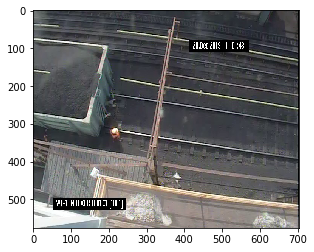

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [7]:
temp = frame[300:340,202:230]

In [8]:
#temp = frame[246:275,246:270]
#cv2.imwrite("template1.jpg",temp)

template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

while(True):

    ret, img = cap.read()
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(imgGray,template,cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF_NORMED)cv2.TM_CCOEFF
    threshold = 0.79
    loc = np.where( res >= threshold)
    
    if len(loc) == 2:
        for pt in zip(*loc[::-1]):
            print(pt)
            cv2.rectangle(imgGray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
            template = imgGray[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
            w, h = template.shape[::-1]
            break
    ''' else:
        template = cv2.imread('template1.jpg',0)
        w, h = template.shape[::-1]'''
        
            
    cv2.imshow("ij",imgGray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bs

In [9]:
backSub = cv2.createBackgroundSubtractorMOG2(300,200,2)
#backSub = cv2.createBackgroundSubtractorKNN(detectShadows=False)
    
capture = cv2.VideoCapture(cv2.samples.findFileOrKeep("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov"))

capture.set(cv2.CAP_PROP_POS_FRAMES,400)

if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    #blurFrame = cv2.GaussianBlur(frame,(11,9),0)
    
    fgMask = backSub.apply(frame)
    
    cv2.rectangle(fgMask, (410, 80), (573,110), (0), -1)
    cv2.rectangle(fgMask, (20, 300), (40,345), (0), -1)  # time = [410,80,573,110]  blinkRed = [20,300,40,345]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgMask = dilation = cv2.dilate(fgMask,kernel,iterations = 15)
    
    '''img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)'''
    
    
    # thrsh
    _,undistortedThreh = cv2.threshold(fgMask,230,250,cv2.THRESH_BINARY) 
    blank = np.zeros((undistortedThreh.shape))
    cntDraw = blank.copy()
    # cnts
    _ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    
    if len(cnts)< 15:
        for c in cnts:
            print(cv2.contourArea(c))
            if cv2.contourArea(c) < 3000 and cv2.contourArea(c) > 35:
                perimeter = cv2.arcLength(c,True)
                epsilon = 0.1*cv2.arcLength(c,True)
                approx = cv2.approxPolyDP(c,epsilon,True)
                x,y,w,h = cv2.boundingRect(approx)
                if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
                    #cv2.rectangle(frame, (250,45), (350,85), (255,255,255), -1)
                    cv2.putText(frame, "....Man IN Danger Zone....", (175, 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
                    
                cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,25), 2)
                cntDraw = cv2.drawContours(blank,[approx],-1,255,2)
            
            
        
    print("Next----------------------------------------------------------------------------------------------")
    
    #draw cnt
    
    
    
        
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    #cv2.imshow('thresh', undistortedThreh)
    cv2.imshow('Cnt Draw', cntDraw)
    #time.sleep(.1)
    
    '''cv2.imshow('g', g)
    cv2.imshow('b', b)
    cv2.imshow('h', h)
    cv2.imshow('s', s)
    cv2.imshow('v', v)'''
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

Next----------------------------------------------------------------------------------------------
710.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
660.0
Next----------------------------------------------------------------------------------------------
888.0
Next----------------------------------------------------------------------------------------------
1967.0
1007.0
Next----------------------------------------------------------------------------------------------
8266.5
480.0
480.0
450.0
450.0
450.0
450.0
450.0
450.0
450.0
450.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
7313.0
450.0
77.5
12.0
2.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
7128.5
450.0
450.0
410.0
210.0
7.0
Next----------------------------------------------------------------------------------------------
6134.0
510.0
17.5
4

930.5
450.0
450.0
450.0
450.0
450.0
450.0
450.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
5733.0
954.0
930.5
450.0
450.0
450.0
450.0
450.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
5521.5
1210.0
930.5
450.0
450.0
450.0
450.0
450.0
450.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
5588.5
1210.0
930.5
450.0
450.0
450.0
450.0
450.0
450.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
5098.0
954.0
930.5
450.0
450.0
450.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
3532.0
1242.0
930.5
480.0
450.0
450.0
450.0
450.0
450.0
449.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
3126.5
954.0
930.5
450.0
450.0
449.0

2243.5
1386.0
480.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
2185.0
1314.0
780.0
536.0
450.0
Next----------------------------------------------------------------------------------------------
2626.5
1296.5
450.0
450.0
Next----------------------------------------------------------------------------------------------
3727.5
1299.5
450.0
450.0
450.0
59.0
Next----------------------------------------------------------------------------------------------
4421.0
1332.5
450.0
450.0
16.0
5.5
Next----------------------------------------------------------------------------------------------
4655.5
1320.5
450.0
450.0
31.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
4574.0
1254.5
450.0
450.0
450.0
2.0
Next----------------------------------------------

5022.0
746.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
4331.5
689.5
450.0
Next----------------------------------------------------------------------------------------------
4354.5
510.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
4771.5
509.0
7.0
2.0
Next----------------------------------------------------------------------------------------------
4743.5
509.0
Next----------------------------------------------------------------------------------------------
2265.0
480.0
450.0
Next----------------------------------------------------------------------------------------------
1277.5
536.0
450.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
2846.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
2989.0
450.0
450.0
450.0
2.0
2.0
2.0
2.0

3516.0
571.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
4371.0
602.0
2.0
2.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
4626.0
480.0
Next----------------------------------------------------------------------------------------------
4351.5
571.0
450.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
4972.5
450.0
10.0
Next----------------------------------------------------------------------------------------------
4792.5
10.0
2.0
Next----------------------------------------------------------------------------------------------
4567.0
508.0
Next----------------------------------------------------------------------------------------------
3014.0
566.0
480.0
2.0
Next----------------------------------------------------------------------------------------------
570.0
563.0
Next----------------------------

480.0
450.0
450.0
8.5
2.0
Next----------------------------------------------------------------------------------------------
3861.5
1805.5
480.0
450.0
Next----------------------------------------------------------------------------------------------
2739.0
1826.0
480.0
480.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
1828.0
751.0
618.0
480.0
450.0
Next----------------------------------------------------------------------------------------------
1820.0
1107.0
989.5
788.0
480.0
450.0
Next----------------------------------------------------------------------------------------------
2813.5
1808.0
480.0
450.0
450.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
3717.5
1778.5
480.0
450.0
450.0
2.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
4301.5
1731.0
480.0
450.0
Next----------------------------------

942.0
450.0
2.0
2.0
2.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
4171.5
1267.5
981.0
Next----------------------------------------------------------------------------------------------
4411.5
1257.0
981.0
10.0
Next----------------------------------------------------------------------------------------------
4525.5
1274.5
941.0
Next----------------------------------------------------------------------------------------------
3907.5
1262.5
1180.5
Next----------------------------------------------------------------------------------------------
4487.5
1262.5
1180.5
2.0
2.0
Next----------------------------------------------------------------------------------------------
4358.0
1273.0
1000.0
8.5
2.0
Next----------------------------------------------------------------------------------------------
4121.5
1267.0
996.0
450.0
Next----------------------------------------------------------------------------------------------
2826.5

904.0
777.0
Next----------------------------------------------------------------------------------------------
4055.0
910.0
777.0
Next----------------------------------------------------------------------------------------------
3763.5
919.5
690.0
5.5
2.0
2.0
Next----------------------------------------------------------------------------------------------
4294.5
1082.5
870.0
Next----------------------------------------------------------------------------------------------
4048.0
1067.0
870.0
Next----------------------------------------------------------------------------------------------
2536.5
1061.0
735.5
450.0
450.0
Next----------------------------------------------------------------------------------------------
1317.0
894.0
764.5
725.0
Next----------------------------------------------------------------------------------------------
2339.0
1032.0
885.5
Next----------------------------------------------------------------------------------------------
1959.0
1047.5
865.0
450.0
2.0

508.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
1880.5
508.0
450.0
Next----------------------------------------------------------------------------------------------
2069.5
508.0
450.0
450.0
Next----------------------------------------------------------------------------------------------
2713.0
508.0
450.0
Next----------------------------------------------------------------------------------------------
3999.5
508.0
450.0
Next----------------------------------------------------------------------------------------------
4101.5
508.0
450.0
2.0
Next----------------------------------------------------------------------------------------------
4225.0
508.0
450.0
Next----------------------------------------------------------------------------------------------
3825.5
508.0
450.0
2.0
2.0
Next----------------------------------------------------------------------------------------------
4334.5
508.0
450.0
Next----------------

Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next------

In [135]:
#%matplotlib notebook

In [136]:
x = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

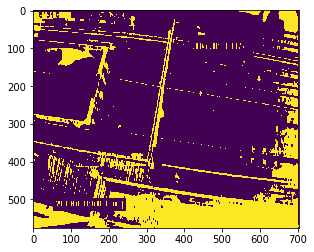

In [137]:
#_,undistortedThreh = cv2.threshold(x,100,250,cv2.THRESH_BINARY) 
undistortedThreh = cv2.adaptiveThreshold(x, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 591,-15)
undistortedThreh = cv2.erode(undistortedThreh.copy(),(7,7), iterations = 4)
# cnts
_ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
plt.imshow(undistortedThreh)

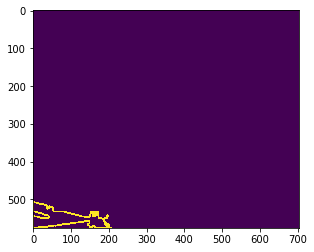

In [138]:
blank = np.zeros((x.shape))
cntDraw = blank.copy()
blank = cv2.drawContours(blank.copy(),cnts,1,255,3)
plt.imshow(blank)

In [258]:
#if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
x = cv2.line(x,(0,300),(691,430),0,5)
x = cv2.line(x,(0,50),(691,165),0,5)

In [257]:
for c in cnts:
    if cv2.contourArea(c) > 5000:
        perimeter = cv2.arcLength(c,True)
        epsilon = 0.1*cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv2.boundingRect(approx)
        
        if  y > 50 and y < 430:
            frame[y:y+h,x:691] = emptyTrain[y:y+h,x:691]
            



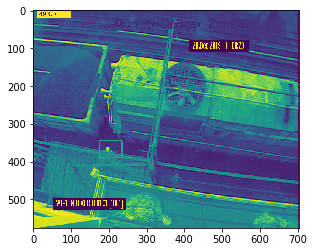

In [65]:
plt.imshow(x)

In [35]:
time = [410,80,573,110]
blink = [20,300,40,345]

165,190,691,423

(165, 190, 691, 423)